In [3]:
import numpy as np
import pandas as pd
import datetime

# Parámetros de muestreo
sampling_rate = 100  # Frecuencia de muestreo en Hz
duration = 5  # Duración de la señal en segundos

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Función para agregar ruido a la señal
'''
def add_noise(signal, noise_level):
    noise = noise_level * np.random.normal(size=signal.shape)
    noise -= np.mean(noise)  # Asegurar que la media del ruido sea cero
    return signal + noise

# Función para agregar un desfase aleatorio
def add_random_phase_shift(frequency, sampling_rate, amplitude):
    phase_shift = 2 * np.pi * np.random.rand()  # Desfase aleatorio en radianes
    t_shifted = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal_shifted = amplitude * np.sin(2 * np.pi * frequency * t_shifted + phase_shift)
    return signal_shifted
'''

# Función para simular los datos de vibración
def simulate_vibration_data(frequency, amplitude, noise_level, sampling_rate, duration):
    
    signal = amplitude * np.sin(2 * frequency * t) + np.random.normal(scale=noise_level, size=duration * sampling_rate)
    phase_shift = np.random.normal(scale=np.pi)
    signal = signal + phase_shift
    
    #signal = amplitude * np.sin(2 * np.pi * frequency * t) 
    #signal_with_shift = add_random_phase_shift(frequency, sampling_rate, amplitude)
    #signal_with_noise = add_noise(signal_with_shift, noise_level)
    return signal

# Función para simular los datos del sensor de torque
def simulate_torque_data(good=True):
    if good:
        return 25 + 0.5 * np.random.normal(size=t.shape)
    else:
        return 20 + 2 * np.random.normal(size=t.shape)

# Función para simular los datos del sensor de temperatura
def simulate_temperature_data(good=True):
    if good:
        temp = 25 + 0.5 * (1 - np.exp(-t/5)) + 0.1 * np.random.normal(size=t.shape)
    else:
        temp = 25 + 3 * (1 - np.exp(-t/5)) + 0.3 * np.random.normal(size=t.shape)
    return temp

# Crear el dataset
data = []
tool_ids = range(1, 11)
conditions = ['Good'] * 7 + ['Faulty'] * 3
np.random.shuffle(conditions)

for tool_id, condition in zip(tool_ids, conditions):
    is_good = condition == 'Good'
    
    # Simulación de vibración
    vibration = simulate_vibration_data(100, 2000, 100 if is_good else 1500, sampling_rate, duration)
    
    # Simulación de torque
    torque = simulate_torque_data(good=is_good)
    
    # Simulación de temperatura
    temperature = simulate_temperature_data(good=is_good)
    
    # Crear registros con timestamps y contador de medición
    timestamp = datetime.datetime.now()
    for i in range(len(t)):
        data.append([timestamp + datetime.timedelta(seconds=i/sampling_rate), i, tool_id, vibration[i], torque[i], temperature[i], condition])

# Convertir a DataFrame y guardar en CSV
df = pd.DataFrame(data, columns=['Timestamp', 'Measurement_Count', 'Tool_ID', 'Vibration', 'Torque', 'Temperature', 'Condition'])
df.to_csv('C_sensor_data.csv', index=False)

print("El dataset ha sido generado y guardado en 'C_sensor_data.csv'")

El dataset ha sido generado y guardado en 'C_sensor_data.csv'


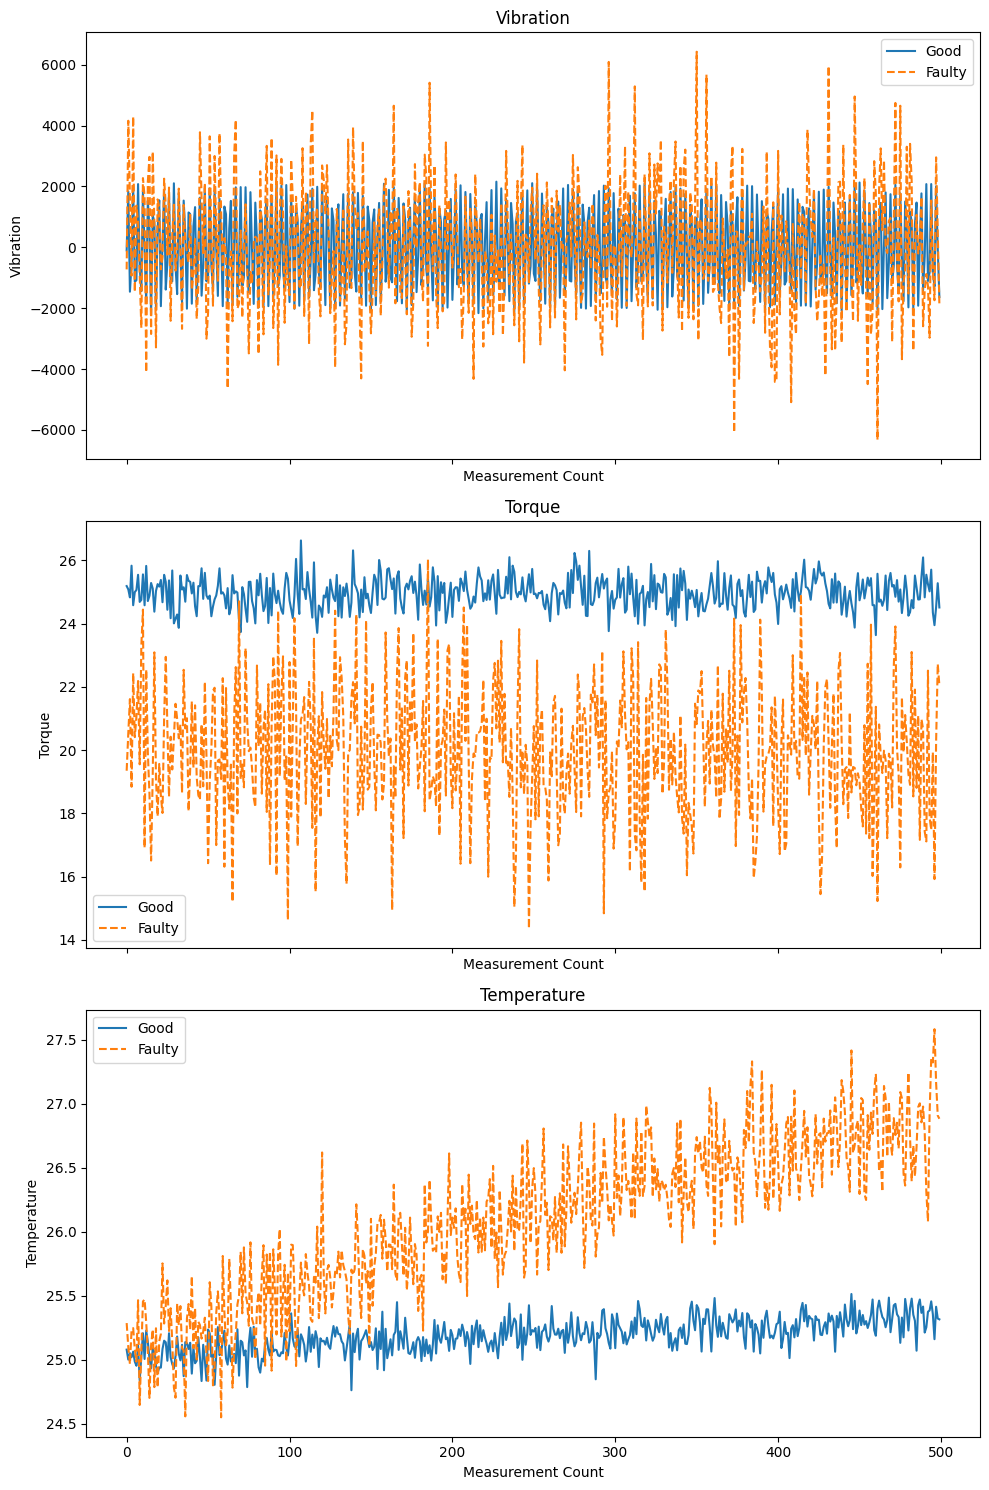

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C_sensor_data.csv')

good_tool_id = df[df['Condition'] == 'Good']['Tool_ID'].unique()[0]
faulty_tool_id = df[df['Condition'] == 'Faulty']['Tool_ID'].unique()[0]

df_good = df[df['Tool_ID'] == good_tool_id]
df_faulty = df[df['Tool_ID'] == faulty_tool_id]

variables = ['Vibration', 'Torque', 'Temperature']

fig, axes = plt.subplots(len(variables), 1, figsize=(10, 15), sharex=True)

for i, variable in enumerate(variables):
    axes[i].plot(df_good['Measurement_Count'], df_good[variable], label='Good')
    axes[i].plot(df_faulty['Measurement_Count'], df_faulty[variable], label='Faulty', linestyle='--')
    axes[i].set_title(variable)
    axes[i].set_xlabel('Measurement Count')
    axes[i].set_ylabel(variable)
    axes[i].legend()

plt.tight_layout()
plt.show()
